# Проектная работа

## Описание проекта

Задача: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Вам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

## Описание данных
В вашем распоряжении три датасета.
- Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.

Структура visits_log.csv
- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор источника перехода на сайт.

Структура orders_log.csv
- Uid — уникальный идентификатор пользователя,
- Buy Ts — дата и время заказа,
- Revenue — сумма заказа.

Структура costs.csv
- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.

## Выгрузим данные, подготовим их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
warnings.simplefilter("ignore")

In [142]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [143]:
print(visits.info())
print(visits.describe())
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [144]:
visits.columns = ['Device', 'End_Ts','Source_Id','Start_Ts','Uid']

In [145]:
visits['Start_Ts'] = pd.to_datetime(visits['Start_Ts'])
visits['End_Ts'] = pd.to_datetime(visits['End_Ts'])

In [146]:
print(orders.info())
print(orders.describe())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [147]:
orders.columns = ['Buy_Ts','Revenue','Uid']

In [148]:
orders['Buy_Ts'] = pd.to_datetime(orders['Buy_Ts'])

In [149]:
print(costs.info())
print(costs.describe())
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [150]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [151]:
visits.isna().sum()

Device       0
End_Ts       0
Source_Id    0
Start_Ts     0
Uid          0
dtype: int64

In [152]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [153]:
orders.isna().sum()

Buy_Ts     0
Revenue    0
Uid        0
dtype: int64

Видим, что пропущенных значений нет ни в одной таблице. Проверим дубликаты:

In [154]:
visits.duplicated().sum()

0

In [155]:
orders.duplicated().sum()

0

In [156]:
costs.duplicated().sum()

0

In [157]:
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

In [158]:
device = pd.Categorical(visits['Device'], ordered=True)

In [159]:
device

[touch, desktop, touch, desktop, desktop, ..., desktop, touch, desktop, desktop, touch]
Length: 359400
Categories (2, object): [desktop < touch]

Видим, что посетителей с мобильных девайсов больше, чем с десктопа

In [160]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [161]:
((visits['Start_Ts'] >= '2017-06-01') & (visits['Start_Ts'] <= '2018-05-31')).unique()

array([ True, False])

Видим, что не все данные в нужном нам временном промежутке, поэтому оставим только исследуемую часть:

In [162]:
visits=visits[(visits['Start_Ts'] >= '2017-06-01') & (visits['Start_Ts'] <= '2018-05-31')]

In [163]:
visits

,Device,End_Ts,Source_Id,Start_Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


Дубликатов тоже нет ни в одной таблице

### Вывод: 
Убедились, что в колонках указаны значения с правильным типом данных.

## Рассчитаем метрики и построим графики

Посчитаем метрики трёх видов:
- продуктовые,
- метрики электронной коммерции,
- маркетинговые.

Отобразим на графиках изменения каждой метрики во времени.

### Рассчитаем продуктовые метрики:

####  DAU, WAU и MAU

In [164]:
visits['session_year'] = visits['Start_Ts'].astype('datetime64[Y]')

In [165]:
visits['session_month'] = visits['Start_Ts'].astype('datetime64[M]')

In [166]:
visits['session_week'] = visits['Start_Ts'].astype('datetime64[W]')

In [167]:
visits['session_date'] = visits['Start_Ts'].dt.date

In [168]:
mau = visits.groupby(['session_month']).agg({'Uid':'nunique'}).reset_index()

In [169]:
dau = visits.groupby('session_date').agg({'Uid':'nunique'}).reset_index()

In [170]:
wau = (
    visits.groupby(['session_week'])
    .agg({'Uid': 'nunique'})
).reset_index()

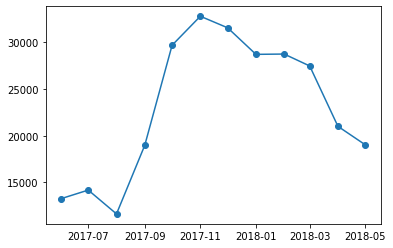

In [171]:
line = plt.plot(mau['session_month'], mau['Uid'], 'o-')

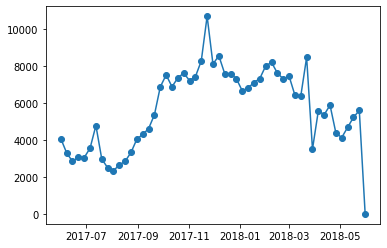

In [172]:
line1 = plt.plot(wau['session_week'], wau['Uid'], 'o-')

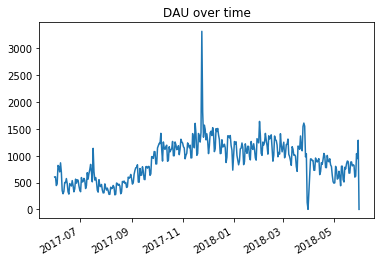

In [173]:
fig, ax = plt.subplots()
ax.plot(dau['session_date'], dau['Uid'])
ax.set_title('DAU over time')
fig.autofmt_xdate()

plt.show()

Изобразили необходимые метрики на графиках, показывающих их изменения во времени

Из графиков видно, что количество активных пользователей в день остается почти всегда стабильным, а в течение долгосрочных периодов уменьшается. Люди чаще заходят на сайт зимой-весной, видимо, потому что на улице холодно :)

#### сколько раз за день пользователи в среднем заходят на сайт

In [174]:
session_per_user = visits.groupby(['session_date']).agg({'Uid': ['count','nunique']})

In [175]:
session_per_user.columns = ['n_sessions', 'n_users']

In [176]:
session_per_user['number'] = session_per_user['n_sessions']/session_per_user['n_users']

In [177]:
session_per_user

,n_sessions,n_users,number
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


In [178]:
mean = session_per_user['n_sessions'].mean()
mean

981.1675824175824

Нашли среднее число сессий за весь период, около тысячи.

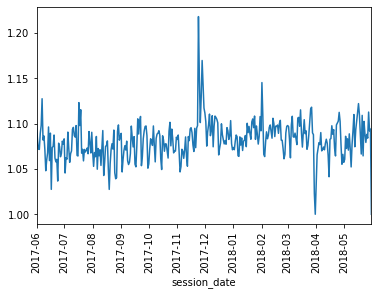

In [40]:
session_per_user['number'].plot()
plt.xticks(rotation=90)
plt.show()

#### Вывод
Видим, что в среднем люди проводят 1.05 - 1.1 сессию в день, самый максимум (1.2) был достигнут в ноябре 17 года, а минимум - в марте 18. 

В день один пользователь в среднем проводит в приложении максимум 1.2 cессии. Сервис пользуется средней популярностью

#### Средняя продолжительность сессии

In [41]:
visits['session_duration_sec'] = (visits['End_Ts'] - visits['Start_Ts']).dt.seconds

[]

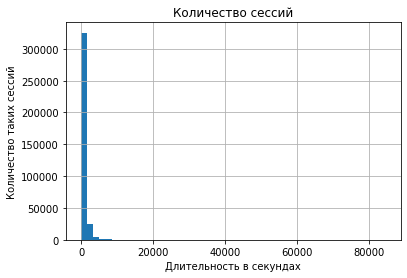

In [42]:
visits['session_duration_sec'].hist(bins=50)
plt.xlabel('Длительность в секундах')
plt.ylabel('Количество таких сессий')
plt.title('Количество сессий')
plt.plot()

Так как тип распределения не близок к нормальному, необходимо рассчитать моду:

In [43]:
visits['session_duration_sec'].mode()[0]

60

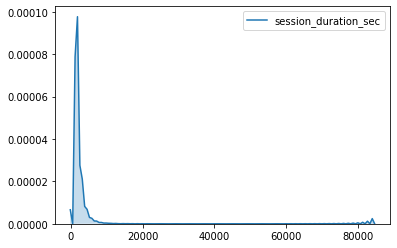

In [44]:
snsplot = sns.kdeplot(visits['session_duration_sec'], shade=True)
fig = snsplot.get_figure()

#### Вывод
видим, что средняя продолжительность сессии в среднем очень мала. Это может быть связано с тем, что пользователи не могут сразу найти необходимую информацию и/или сразу заходят на сайт с четкой целью.

####  Рассчитайте Retention Rate

Применим когортный анализ для рассчитывания RR

In [179]:
first_visit_date_by_customers = visits.groupby('Uid')[
    'Start_Ts'
].min()

In [46]:
first_visit_date_by_customers.name = 'first_visit_date'

In [47]:
first_visit_date_by_customers

Uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_visit_date, Length: 226742, dtype: datetime64[ns]

In [183]:
visits = visits.merge(first_visit_date_by_customers, on='Uid', how = 'left')
visits.head(10)

,Device,End_Ts,Source_Id,Start_Ts_x,Uid,session_year,session_month,session_week,session_date,Start_Ts_y,Start_Ts_x,Start_Ts_y
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,2017-12-20 17:20:00,2017-12-20 17:20:00,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,2018-02-19 16:53:00,2018-02-19 16:53:00,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,2018-03-09 20:05:00,2018-03-09 20:05:00,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,2018-03-09 20:05:00,2018-03-09 20:05:00,2018-03-09 20:05:00
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27 14:06:00
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,2017-09-03 21:35:00,2017-09-03 21:35:00,2017-09-03 21:35:00
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-01-01,2017-10-01,2017-10-26,2017-10-27,2017-09-03 21:35:00,2017-09-03 21:35:00,2017-09-03 21:35:00
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-04,2017-09-03 21:35:00,2017-09-03 21:35:00,2017-09-03 21:35:00
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-01-01,2017-10-01,2017-10-26,2017-10-27,2017-09-03 21:35:00,2017-09-03 21:35:00,2017-09-03 21:35:00


visits['first_visit_month'] = visits['first_visit_date'].astype(
    'datetime64[M]'
)
visits['session_month'] = visits['session_date'].astype('datetime64[M]')
visits

In [ ]:
cohort_grouped = visits.groupby('first_visit_month').agg(
    {'Uid': 'nunique'}
)
cohort_grouped

In [51]:
pivot_visits = visits.pivot_table(
    index='first_visit_month',
    columns='session_month',
    values='Uid',
    aggfunc='nunique',
) 

In [52]:
pivot_visits

session_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,578.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,341.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,252.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,369.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,504.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,560.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,455.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,437.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,421.0


Нашли количество уникальных посетителей в определенные периоды времени.

In [108]:
visits['cohort_lifetime'] = ((visits['session_month'] - visits['first_visit_month'])/np.timedelta64(1,'W')).astype(int).round()

In [109]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()

In [110]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_visit_month', 'Uid']]

In [111]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')

In [112]:
cohorts['retention'] = cohorts['Uid_x']/cohorts['Uid_y']

In [113]:
cohorts

,first_visit_month,cohort_lifetime,Uid_x,Uid_y,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,4,1043,13259,0.078664
2,2017-06-01,9,713,13259,0.053775
3,2017-06-01,13,814,13259,0.061392
4,2017-06-01,17,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,4,861,20589,0.041818
74,2018-03-01,9,524,20589,0.025450
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,4,744,15709,0.047361


In [114]:
retention_pivot = cohorts.pivot_table(index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')

In [115]:
retention_pivot.reset_index()

cohort_lifetime,first_visit_month,0,4,8,9,13,17,18,22,26,30,31,35,39,43,48
0,2017-06-01,1.0,0.078664,NaN,0.053775,0.061392,0.068557,NaN,0.071423,0.061015,NaN,0.057772,0.052342,0.050833,0.040652,0.043593
1,2017-07-01,1.0,0.056088,NaN,0.051294,0.056164,NaN,0.058219,0.048174,0.045358,NaN,0.045738,0.038813,0.028615,0.025951,NaN
2,2017-08-01,1.0,0.076908,NaN,0.062862,0.062764,0.050093,NaN,0.044004,0.036342,0.039485,NaN,0.027895,0.024752,NaN,NaN
3,2017-09-01,1.0,0.085489,NaN,0.069205,0.050706,0.039392,NaN,0.037835,0.035860,0.024186,NaN,0.022091,NaN,NaN,NaN
4,2017-10-01,1.0,0.078608,NaN,0.052239,0.038958,NaN,0.034261,0.032221,0.021365,0.019402,NaN,NaN,NaN,NaN,NaN
5,2017-11-01,1.0,0.078281,NaN,0.044113,0.038682,0.033727,NaN,0.023415,0.020552,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-12-01,1.0,0.055802,NaN,0.037993,0.031107,0.020263,NaN,0.018007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-01,1.0,0.059715,0.039339,NaN,0.024973,0.019316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-02-01,1.0,0.057080,0.025454,NaN,0.018967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-03-01,1.0,0.041818,NaN,0.025450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
retention_pivot[8].mean()

0.03239632273471975

Нашли средний Retention Rate на второй месяц «жизни» когорт.

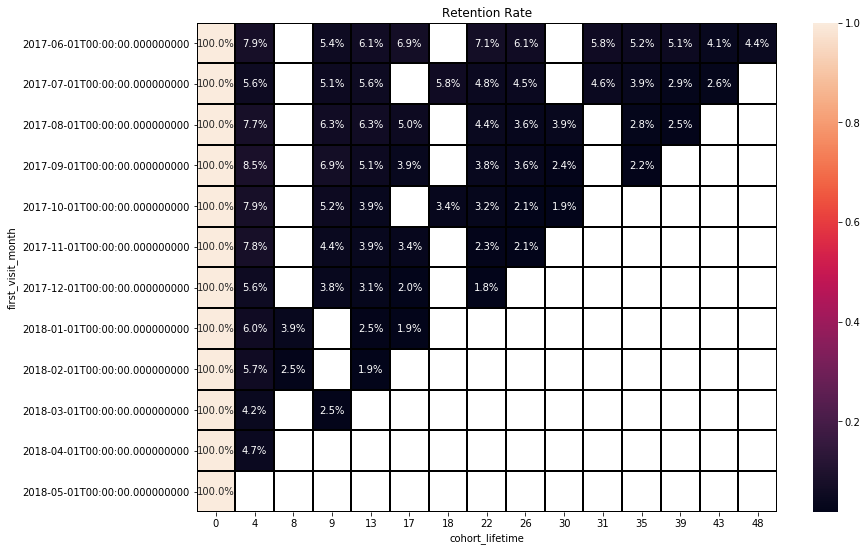

In [117]:
plt.figure(figsize=(13, 9))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='black')

Видим, что наибольшее количество визитов было совершено июньской и октябрьскими когортами.

### Метрики электронной коммерции

#### сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

In [63]:
visits = visits.rename(columns = {'Uid_x':'Uid'})
visits

,Device,End_Ts,Source_Id,Start_Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visit_date,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,8
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357140,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-01-01,2017-07-01,2017-07-27,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,0
357141,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-01,2018-01-25,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,0
357142,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-01-01,2018-03-01,2018-03-01,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,0
357143,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-01-01,2017-11-01,2017-11-02,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,0


In [64]:
first_to_bought = visits.merge(orders, on='Uid')

In [65]:
first = pd.DataFrame()
first['first_bought'] = orders.groupby('Uid')['Buy_Ts'].min()
first_to_bought = first_to_bought.merge(first, on='Uid', how='left')
first_to_bought

,Device,End_Ts,Source_Id,Start_Ts,Uid,session_year,session_month,session_week,session_date,session_duration_sec,first_visit_date,first_visit_month,cohort_lifetime,Buy_Ts,Revenue,first_bought
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,8,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-01,0,2018-03-09 20:25:00,2.33,2018-03-09 20:25:00
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-09-04 12:46:00,2.44,2017-09-04 12:46:00
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-10-28 00:01:00,1.53,2017-09-04 12:46:00
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-10-28 19:16:00,1.53,2017-09-04 12:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758129,desktop,2017-11-20 23:44:00,4,2017-11-20 23:33:00,11750532881998794555,2017-01-01,2017-11-01,2017-11-16,2017-11-20,660,2017-11-20 23:33:00,2017-11-01,0,2017-11-20 23:43:00,3.67,2017-11-20 23:43:00
758130,touch,2018-05-30 23:39:00,2,2018-05-30 23:11:00,10394363694271133241,2018-01-01,2018-05-01,2018-05-24,2018-05-30,1680,2018-05-30 23:11:00,2018-05-01,0,2018-05-31 21:48:00,5.50,2018-05-31 21:48:00
758131,touch,2017-11-29 20:48:00,4,2017-11-29 20:27:00,11202626539189016002,2017-01-01,2017-11-01,2017-11-23,2017-11-29,1260,2017-11-29 20:27:00,2017-11-01,0,2017-11-29 20:33:00,3.05,2017-11-29 20:33:00
758132,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-01-01,2018-04-01,2018-04-19,2018-04-23,480,2018-04-23 21:11:00,2018-04-01,0,2018-04-23 21:16:00,0.49,2018-04-23 21:16:00


In [66]:
first_to_bought['time_to_event'] = (
                first_to_bought['first_bought'] - first_to_bought['first_visit_month']
)

In [67]:
first_to_bought['time_to_event'].mean()

Timedelta('28 days 02:34:15.550074')

Рассчитали, что в среднем с дня первого захода на сайт до покупки проходит 28 дней. 

#### рассчитаeм среднее количество покупок на одного покупателя за определённый период

In [68]:
cohort_new1 = first_to_bought.groupby(['first_visit_month', 'Uid']).agg({'Buy_Ts':'nunique'}).reset_index()

In [69]:
cohort_new1


,first_visit_month,Uid,Buy_Ts
0,2017-06-01,1575281904278712,2
1,2017-06-01,16233238570251706,1
2,2017-06-01,28094489227360733,5
3,2017-06-01,29085576454138824,1
4,2017-06-01,29340056013621514,2
...,...,...,...
36183,2018-05-01,18413403606138337462,1
36184,2018-05-01,18417227789295707563,1
36185,2018-05-01,18418973552381796231,1
36186,2018-05-01,18419772037216346332,1


In [70]:
cohort_new = cohort_new1[cohort_new1['first_visit_month'] > '2017-12-28']

In [71]:
cohort_new

,first_visit_month,Uid,Buy_Ts
23174,2018-01-01,2464366381792757,1
23175,2018-01-01,4808417689019433,1
23176,2018-01-01,12436904862559956,1
23177,2018-01-01,21441990708817825,1
23178,2018-01-01,21801295586117262,2
...,...,...,...
36183,2018-05-01,18413403606138337462,1
36184,2018-05-01,18417227789295707563,1
36185,2018-05-01,18418973552381796231,1
36186,2018-05-01,18419772037216346332,1


In [72]:
cohort_new['Buy_Ts'].mean()

1.2050868295681574

В среднем одним человеком совершалась одна покупка в течение последних 6 месяцев.

#### Рассчитаем средний чек

In [73]:
order_date = orders.groupby(orders['Buy_Ts'].dt.month)['Uid','Revenue'].mean()
order_date


,Uid,Revenue
Buy_Ts,,
1,9128001955588630528,4.112927
2,8984572438063144960,4.840095
3,9193315293063396352,5.413930
4,8975084476919762944,5.150645
5,9079202585703793664,4.771279
6,9004665152890979328,4.059834
7,9229717811768844288,5.306589
8,9086443336258735104,4.847139
9,9180070757796361216,5.416448


In [74]:
order_date['Revenue'].mean()

4.956901936821488

Рассчитали средний чек по месяцам и средний чек за весь период

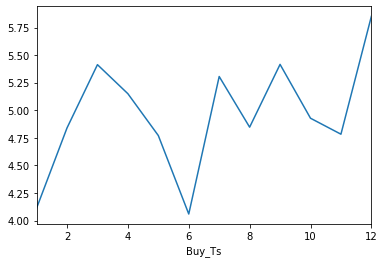

In [75]:
order_date['Revenue'].plot()

Видим, что средний чек разнится от месяца к месяцу, например, наибольший средний чек был в декабре, а наименьший - в июне. 

Такая динамика может говорить о том, что в какие-то месяцы могут проводиться больше мероприятий, а в какие-то меньше. Или же в определенные месяцы проводились акции или скидки

####  Выясним, как меняется LTV на покупателя по когортам

In [76]:
orders['Buy_Ts'] = orders['Buy_Ts'].astype('datetime64[M]')

In [77]:
first_orders = orders.groupby('Uid').agg({'Buy_Ts': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

In [78]:
first_orders.head()

,Uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [79]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'Uid': 'nunique'})
    .reset_index()
)

In [80]:
cohort_sizes.rename(columns={'Uid': 'n_buyers'}, inplace=True)

In [81]:
orders['order_month'] = orders['Buy_Ts'].astype('datetime64[M]')
orders

,Buy_Ts,Revenue,Uid,order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-01,4.64,12296626599487328624,2018-05-01
50411,2018-05-01,5.80,11369640365507475976,2018-05-01
50412,2018-05-01,0.30,1786462140797698849,2018-05-01
50413,2018-05-01,3.67,3993697860786194247,2018-05-01


In [82]:
orders_new = pd.merge(orders,first_orders, on='Uid', how='inner').groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum'}).reset_index()

In [83]:
orders_new

,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [84]:
orders_new['first_order_month'] = orders_new['first_order_month'].astype('datetime64[M]')

In [85]:
orders_new['age_month'] = ((orders_new['order_month'] - orders_new['first_order_month']) / np.timedelta64(1,'M')).round()
orders_new.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']
orders_new

,first_order_month,order_month,revenue,age_month
0,2017-06-01,2017-06-01,9557.49,0.0
1,2017-06-01,2017-07-01,981.82,1.0
2,2017-06-01,2017-08-01,885.34,2.0
3,2017-06-01,2017-09-01,1931.30,3.0
4,2017-06-01,2017-10-01,2068.58,4.0
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2.0
75,2018-04-01,2018-04-01,10600.69,0.0
76,2018-04-01,2018-05-01,1209.92,1.0
77,2018-05-01,2018-05-01,13925.76,0.0


In [86]:
cohorts = pd.merge(orders, first_orders, how='inner', on='Uid')\
.groupby(['first_order_month', 'Buy_Ts'])\
.agg({'Revenue': 'sum'}).reset_index()

In [87]:
cohorts['age_month'] = ((cohorts['Buy_Ts'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()

In [88]:
cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'age_month']

In [89]:
cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
cohorts_report

,first_order_month,n_buyers,order_month,revenue,age_month
0,2017-06-01,2023,2017-06-01,9557.49,0.0
1,2017-06-01,2023,2017-07-01,981.82,1.0
2,2017-06-01,2023,2017-08-01,885.34,2.0
3,2017-06-01,2023,2017-09-01,1931.30,3.0
4,2017-06-01,2023,2017-10-01,2068.58,4.0
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2.0
75,2018-04-01,2276,2018-04-01,10600.69,0.0
76,2018-04-01,2276,2018-05-01,1209.92,1.0
77,2018-05-01,2988,2018-05-01,13925.76,0.0


In [90]:
cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']

In [91]:
cohorts_age = cohorts_report.pivot_table(index='first_order_month', columns='age_month', values='rev_per_buyer', aggfunc='sum').cumsum(axis=1)

In [92]:
cohorts_age.reset_index()

age_month,first_order_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
1,2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2,2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
3,2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
4,2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
5,2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
6,2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-03-01,4.838803,5.139694,5.455253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report

,first_order_month,n_buyers,order_month,revenue,age_month
0,2017-06-01,2023,2017-06-01,9557.49,0.0
1,2017-06-01,2023,2017-07-01,981.82,1.0
2,2017-06-01,2023,2017-08-01,885.34,2.0
3,2017-06-01,2023,2017-09-01,1931.30,3.0
4,2017-06-01,2023,2017-10-01,2068.58,4.0
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2.0
75,2018-04-01,2276,2018-04-01,10600.69,0.0
76,2018-04-01,2276,2018-05-01,1209.92,1.0
77,2018-05-01,2988,2018-05-01,13925.76,0.0


In [94]:
report['ltv'] = report['revenue'] / report['n_buyers']
report

,first_order_month,n_buyers,order_month,revenue,age_month,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0.0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1.0,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2.0,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3.0,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4.0,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2.0,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0.0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1.0,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0.0,4.660562


In [95]:
result = report.pivot_table(
    index='first_order_month', columns='age_month', values='ltv', aggfunc='mean'
).round()
result.fillna('') 

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,5.0,0,0,1,1,1,1,1,1,1,1,0
2017-07-01,6.0,0,1,0,0,0,0,0,0,0,0,
2017-08-01,5.0,0,0,0,0,0,0,0,0,0,,
2017-09-01,6.0,1,1,4,0,1,1,0,0,,,
2017-10-01,5.0,1,0,0,0,0,0,0,,,,
2017-11-01,5.0,0,0,0,0,0,0,,,,,
2017-12-01,5.0,0,1,1,0,0,,,,,,
2018-01-01,4.0,0,0,0,0,,,,,,,
2018-02-01,4.0,0,0,0,,,,,,,,


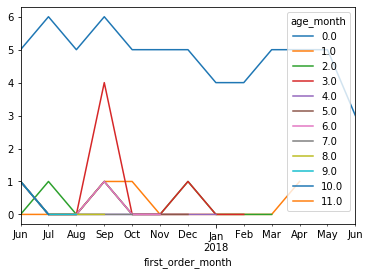

In [96]:
result.plot()

In [97]:
m6_cum_ltv = result.cumsum(axis=1).mean(axis=0)[5]
m6_cum_ltv

7.285714285714286

In [98]:
print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv)

Средний LTV за 6 месяцев после первой покупки: 7.285714285714286


Видим изменение LTV во времени для каждой из когорт.

Видим, что метрика со временем только увеличивается.

Все равно что-то страшное получилось...

### Маркетинговые метрики

Посчитайте и отобразите на графиках, как маркетинговые метрики различаются по рекламным источникам.

####  Посчитайте общую сумму расходов на маркетинг

In [99]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [100]:
monthly_costs = costs.groupby('month').sum()
report_new = pd.merge(
    report, monthly_costs, left_on='first_order_month', right_on='month'
)
report_new

,first_order_month,n_buyers,order_month,revenue,age_month,ltv,source_id,costs
0,2017-06-01,2023,2017-06-01,9557.49,0.0,4.724414,1020,18015.00
1,2017-06-01,2023,2017-07-01,981.82,1.0,0.485329,1020,18015.00
2,2017-06-01,2023,2017-08-01,885.34,2.0,0.437637,1020,18015.00
3,2017-06-01,2023,2017-09-01,1931.30,3.0,0.954671,1020,18015.00
4,2017-06-01,2023,2017-10-01,2068.58,4.0,1.022531,1020,18015.00
...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1.0,0.300892,1025,30415.27
74,2018-03-01,3533,2018-05-01,1114.87,2.0,0.315559,1025,30415.27
75,2018-04-01,2276,2018-04-01,10600.69,0.0,4.657597,986,22289.38
76,2018-04-01,2276,2018-05-01,1209.92,1.0,0.531599,986,22289.38


In [101]:
monthly_costs['costs'].sum()

329131.61999999994

In [102]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']
report_new

,first_order_month,n_buyers,order_month,revenue,age_month,ltv,source_id,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,0.0,4.724414,1020,18015.00,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,1.0,0.485329,1020,18015.00,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,2.0,0.437637,1020,18015.00,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,3.0,0.954671,1020,18015.00,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,4.0,1.022531,1020,18015.00,8.905091,0.114825
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1.0,0.300892,1025,30415.27,8.608907,0.034951
74,2018-03-01,3533,2018-05-01,1114.87,2.0,0.315559,1025,30415.27,8.608907,0.036655
75,2018-04-01,2276,2018-04-01,10600.69,0.0,4.657597,986,22289.38,9.793225,0.475594
76,2018-04-01,2276,2018-05-01,1209.92,1.0,0.531599,986,22289.38,9.793225,0.054282


In [103]:
output = report_new.pivot_table(
    index='first_order_month', columns='age_month', values='romi', aggfunc='mean'
)

In [104]:
output.reset_index()

age_month,first_order_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,2017-06-01,0.530530,0.054500,0.049145,0.107205,0.114825,0.082593,0.106730,0.065310,0.062123,0.068027,0.064150,0.028844
1,2017-07-01,0.633623,0.035339,0.065735,0.037845,0.018638,0.016451,0.012673,0.014951,0.016998,0.015513,0.016412,NaN
2,2017-08-01,0.488747,0.043719,0.042468,0.036243,0.045762,0.026263,0.019513,0.037515,0.027067,0.017412,NaN,NaN
3,2017-09-01,0.597833,0.118368,0.055174,0.421091,0.042425,0.068533,0.074310,0.025753,0.019489,NaN,NaN,NaN
4,2017-10-01,0.597866,0.064015,0.022869,0.018776,0.018109,0.014381,0.010134,0.013797,NaN,NaN,NaN,NaN
5,2017-11-01,0.554931,0.042980,0.021483,0.034983,0.015934,0.005800,0.012373,NaN,NaN,NaN,NaN,NaN
6,2017-12-01,0.542015,0.029785,0.105824,0.121860,0.035797,0.038670,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-01,0.416173,0.029662,0.030620,0.014368,0.006309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-02-01,0.463807,0.031048,0.008760,0.008272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-03-01,0.562069,0.034951,0.036655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'график суммарных расходов')

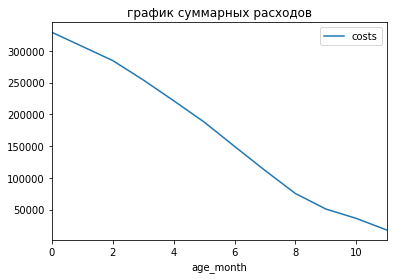

In [105]:
report_new.pivot_table(index='age_month', values='costs', aggfunc='sum').plot() 
plt.title('график суммарных расходов')

Text(0.5, 1.0, 'график расходов по источникам')

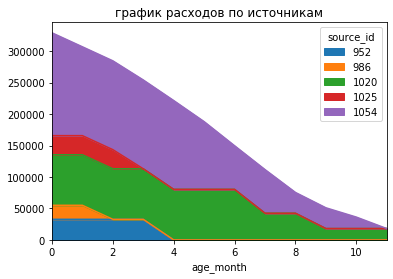

In [106]:
report_new.pivot_table(index='age_month', columns='source_id', values='costs', aggfunc='sum').plot.area()
plt.title('график расходов по источникам')

Рассчитали суммарные расходы за весь период

На графике представлено изменение трат во времени, видим, что наибольшее количество затрат было в ноябре-декабре.

Видим, что разные на разные ресурсы тратят разное количество денег.

#### Рассчитайте средний CAC

In [107]:
report_new['cac'].mean()

9.319905176921116

Рассчитали средний САС.

## Сформулируйте выводы и рекомендации

### Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции

Видим, что коэффициент удержания не так высок, но время от времени покупки разныхми когортами совершаются.

Среднее время, которое проходит от первого визита до покупки - 20 дней, что больше средней жизни одной когорты.

Видим, что средний чек стабильно остается на одинаковом уровне.

### Подведите итоги когортного анализа

Видим, что самая перспективная когорта - люди, которые впервые зашли в июне-августе 2017, так как у них наибольший уровень удержания на сайте.